# **Random Forest Classification - Hands On**
---
# Scenario: Normal condition

### Data

| LIMIT_BAL | INCOME  | Employment_Status | Default |
|-----------|---------|--------------------|---------|
| 100000    | 5256.63 | Self-Employed      | 0       |
| 150000    | 5048.54 | Self-Employed      | 0       |
| 100000    | 5484.32 | Employed           | 0       |
| 150000    | 4648.97 | Self-Employed      | 0       |
| 200000    | 4836.17 | Employed           | 0       |
| 150000    | 4803.95 | Employed           | 1       |
| 200000    | 4268.24 | Self-Employed      | 0       |
| 200000    | 5148.06 | Employed           | 0       |
| 50000     | 5130.53 | Self-Employed      | 0       |
| 150000    | 5002.56 | Employed           | 0       |

---

### Tree 1: Splitting Based on `LIMIT_BAL` and `INCOME`

#### Filtered Dataset:
- Only includes rows where **Employment_Status = 'Employed'**.

| LIMIT_BAL | INCOME  | Employment_Status | Default |
|-----------|---------|--------------------|---------|
| 100000    | 5484.32 | Employed           | 0       |
| 200000    | 4836.17 | Employed           | 0       |
| 150000    | 4803.95 | Employed           | 1       |
| 200000    | 5148.06 | Employed           | 0       |
| 150000    | 5002.56 | Employed           | 0       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{4}{5}\log_2\left(\frac{4}{5}\right) - \frac{1}{5}\log_2\left(\frac{1}{5}\right) = 0.722
$$

#### Step 2: Split 1 - `LIMIT_BAL ≤ 150000`
Left Split (≤ 150000):
- Non-Default: 2
- Default: 1
$$
H(S) = -\frac{2}{3}\log_2\left(\frac{2}{3}\right) - \frac{1}{3}\log_2\left(\frac{1}{3}\right) = 0.918
$$

Right Split (> 150000):
- Non-Default: 2
$$
H(S) = -\frac{2}{2}\log_2\left(\frac{2}{2}\right) = 0
$$

Information Gain:
$$
Gain_{LimitBal} = 0.722 - \left(\frac{3}{5}(0.918) + \frac{2}{5}(0)\right) = 0.171
$$

#### Step 3: Split 2 - `INCOME ≤ 5000`
Left Split (≤ 5000):
- Non-Default: 1
- Default: 1
$$
H(S) = -\frac{1}{2}\log_2\left(\frac{1}{2}\right) - \frac{1}{2}\log_2\left(\frac{1}{2}\right) = 1.0
$$

Right Split (> 5000):
- Non-Default: 3
$$
H(S) = -\frac{3}{3}\log_2\left(\frac{3}{3}\right) = 0
$$

Information Gain:
$$
Gain_{Income} = 0.722 - \left(\frac{2}{5}(1.0) + \frac{3}{5}(0)\right) = 0.322
$$

#### Final Split for Tree 1:
- $Gain_{Income} = 0.322 > Gain_{LimitBal} = 0.171$: split first by `INCOME ≤ 5000`, then by `LIMIT_BAL ≤ 150000`.
---
### Tree 2: Splitting Based on `LIMIT_BAL` and `Employment_Status`
#### Filtered Dataset:
- Only includes rows where **INCOME $\leq$ 5000**.

| LIMIT_BAL | INCOME  | Employment_Status | Default |
|-----------|---------|--------------------|---------|
| 150000    | 4648.97 | Self-Employed      | 0       |
| 200000    | 4836.17 | Employed           | 0       |
| 150000    | 4803.95 | Employed           | 1       |
| 200000    | 4268.24 | Self-Employed      | 0       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{3}{4}\log_2\left(\frac{3}{4}\right) - \frac{1}{4}\log_2\left(\frac{1}{4}\right) = 0.811
$$

#### Step 2: Split 1 - `LIMIT_BAL ≤ 150000`
Left Split (≤ 150000):
- Non-Default: 1
- Default: 1
$$
H(S) = -\frac{1}{2}\log_2\left(\frac{1}{2}\right) - \frac{1}{2}\log_2\left(\frac{1}{2}\right) = 1.0
$$

Right Split (> 150000):
- Non-Default: 2
$$
H(S) = -\frac{2}{2}\log_2\left(\frac{2}{2}\right) = 0
$$

Information Gain:
$$
Gain_{LimitBal} = 0.811 - \left(\frac{2}{4}(1) + \frac{2}{4}(0)\right) = 0.311
$$

#### Step 3: Split 2 - `Employment_Status`
Self-Employed:
- Non-Default: 2
$$
H(S) = 0
$$

Employed:
- Non-Default: 1
- Default: 1
$$
H(S) = 1.0
$$

Information Gain:
$$
Gain_{Employment} = 0.811 - \left(\frac{2}{4}(1) + \frac{2}{4}(0)\right) = 0.311
$$

#### Final Split for Tree 2:
- $ Gain_{LimitBal} = Gain_{Employment} = 0.311$: We can choose either split first, eg. split first by `LIMIT_BAL ≤ 150000`, then by `Employment_Status`.

---

### Tree 3: Splitting Based on `INCOME` and `Employment_Status`

#### Filtered Dataset:
- Only includes rows where **LIMIT_BAL $\leq$ 150000**.

| LIMIT_BAL | INCOME  | Employment_Status | Default |
|-----------|---------|--------------------|---------|
| 100000    | 5256.63 | Self-Employed      | 0       |
| 150000    | 5048.54 | Self-Employed      | 0       |
| 100000    | 5484.32 | Employed           | 0       |
| 150000    | 4648.97 | Self-Employed      | 0       |
| 150000    | 4803.95 | Employed           | 1       |
| 50000     | 5130.53 | Self-Employed      | 0       |
| 150000    | 5002.56 | Employed           | 0       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{6}{7}\log_2\left(\frac{6}{7}\right) - \frac{1}{7}\log_2\left(\frac{1}{7}\right) = 0.591
$$

#### Step 2: Split 1 - `INCOME ≤ 5000`
Left Split (≤ 5000):
- Non-Default: 1
- Default: 1
$$
H(S) = -\frac{1}{2}\log_2\left(\frac{1}{2}\right) - \frac{1}{2}\log_2\left(\frac{1}{2}\right) = 1.0
$$

Right Split (> 5000):
- Non-Default: 5
$$
H(S) = 0
$$

Information Gain:
$$
Gain_{Income} = 0.591 - \left(\frac{2}{7}(1.0) + \frac{5}{7}(0)\right) = 0.305
$$

#### Step 3: Split 2 - `Employment_Status`
Self-Employed:
- Non-Default: 4
$$
H(S) = 0
$$

Employed:
- Non-Default: 2
- Default: 1
$$
H(S) = -\frac{2}{3}\log_2\left(\frac{2}{3}\right) - \frac{1}{3}\log_2\left(\frac{1}{3}\right) = 0.918
$$

Information Gain:
$$
Gain_{Employment} = 0.591 - \left(\frac{4}{7}(0) + \frac{3}{7}(0.918)\right) = 0.198
$$

#### Final Split for Tree 3:
- $Gain_{Income} = 0.305 > Gain_{Employment} = 0.198$: split first by `INCOME ≤ 5000`, then by `Employment_Status`.
---
### Final Model Prediction:
- Combine predictions from all **3 trees** using **majority voting**.

# Scenario: COVID condition

### Data
| LIMIT_BAL | INCOME   | Employment_Status | Default |
|-----------|----------|--------------------|---------|
| 50000     | 697.06   | Unemployed         | 0       |
| 100000    | 1790.18  | Unemployed         | 0       |
| 10000     | 2318.19  | Furloughed         | 0       |
| 100000    | 2520.83  | Unemployed         | 1       |
| 50000     | 886.08   | Furloughed         | 0       |
| 10000	    | 2445.64  | Furloughed		      | 1       |
| 50000     | 1828.45  | Unemployed         | 0       |
| 50000     | 1381.79  | Furloughed         | 1       |
| 10000     | 1546.01  | Unemployed         | 1       |
| 10000     | 2561.30  | Unemployed         | 1       |

---

### Tree 1: Splitting Based on `LIMIT_BAL` and `INCOME`
#### Filtered Dataset:
- Only includes rows where **Employment_Status = 'Unemployed'**.

| LIMIT_BAL | INCOME   | Employment_Status | Default |
|-----------|----------|--------------------|---------|
| 50000     | 697.06   | Unemployed         | 0       |
| 100000    | 1790.18  | Unemployed         | 0       |
| 100000    | 2520.83  | Unemployed         | 1       |
| 50000     | 1828.45  | Unemployed         | 0       |
| 10000     | 1546.01  | Unemployed         | 1       |
| 10000     | 2561.30  | Unemployed         | 1       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{3}{6}\log_2\left(\frac{3}{6}\right) - \frac{3}{6}\log_2\left(\frac{3}{6}\right) = 1
$$

#### Step 2: Split 1 - `LIMIT_BAL ≤ 50000`
Left Split (≤ 50000):
- Non-Default: 2
- Default: 2
$$
H(S) = -\frac{2}{4}\log_2\left(\frac{2}{4}\right) - \frac{2}{4}\log_2\left(\frac{2}{4}\right) = 1
$$

Right Split (> 50000):
- Non-Default: 1
- Default: 1
$$
H(S) = 1
$$

Information Gain:
$$
Gain_{LimitBal} = 1 - \left(\frac{4}{6}(1) + \frac{2}{6}(1)\right) = 0
$$

#### Step 3: Split 2 - `INCOME ≤ 2000`
Left Split (≤ 2000):
- Non-Default: 3
- Default: 1
$$
H(S) = -\frac{3}{4}\log_2\left(\frac{3}{4}\right) - \frac{1}{4}\log_2\left(\frac{1}{4}\right) = 0.811
$$

Right Split (> 2000):
- Default: 2
$$
H(S) = 0
$$

Information Gain:
$$
Gain_{Income} = 1 - \left(\frac{4}{6}(0.811) + \frac{2}{6}(0)\right) = 0.459
$$

#### Final Split for Tree 1:
- $ Gain_{Income} = 0.459 > Gain_{LimitBal} = 0$: split first by `INCOME ≤ 2000`, then by `LIMIT_BAL ≤ 50000`.

---

### Tree 2: Splitting Based on `LIMIT_BAL` and `Employment_Status`
#### Filtered Dataset:
- Only includes rows where **INCOME ≤ 2000**.

| LIMIT_BAL | INCOME   | Employment_Status | Default |
|-----------|----------|--------------------|---------|
| 50000     | 697.06   | Unemployed         | 0       |
| 100000    | 1790.18  | Unemployed         | 0       |
| 50000     | 886.08   | Furloughed         | 0       |
| 50000     | 1828.45  | Unemployed         | 0       |
| 50000     | 1381.79  | Furloughed         | 1       |
| 10000     | 1546.01  | Unemployed         | 1       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{4}{6}\log_2\left(\frac{4}{6}\right) - \frac{2}{6}\log_2\left(\frac{2}{6}\right) = 0.918
$$

#### Step 2: Split 1 - `LIMIT_BAL ≤ 50000`
Left Split (≤ 50000):
- Non-Default: 3
- Default: 2
$$
H(S) = -\frac{3}{5}\log_2\left(\frac{3}{5}\right) - \frac{2}{5}\log_2\left(\frac{2}{5}\right) = 0.971
$$

Right Split (> 50000):
- Non-Default: 1
$$
H(S) = 0
$$

Information Gain:
$$
Gain_{LimitBal} = 0.918 - \left(\frac{5}{6}(0.971) + \frac{1}{6}(0)\right) = 0.109
$$

#### Step 3: Split 2 - `Employment_Status`
Unemployed:
- Non-Default: 3
- Default: 1
$$
H(S) = -\frac{3}{4}\log_2\left(\frac{3}{4}\right) - \frac{1}{4}\log_2\left(\frac{1}{4}\right) = 0.811
$$

Furloughed:
- Non-Default: 1
- Default: 1
$$
H(S) = 1
$$

Information Gain:
$$
Gain_{Employment} = 0.918 - \left(\frac{4}{6}(0.811) + \frac{2}{6}(1)\right) = 0.044
$$

#### Final Split for Tree 2:
- $ Gain_{LimitBal} = 0.109 > Gain_{Employment} = 0.044$: split first by `LIMIT_BAL ≤ 50000`, then by `Employment_Status`.

---

### Tree 3: Splitting Based on `INCOME` and `Employment_Status`
#### Filtered Dataset:
- Only includes rows where **LIMIT_BAL ≤ 50000**.

| LIMIT_BAL | INCOME   | Employment_Status | Default |
|-----------|----------|--------------------|---------|
| 50000     | 697.06   | Unemployed         | 0       |
| 50000     | 886.08   | Furloughed         | 0       |
| 10000	    | 2445.64  | Furloughed		      | 1       |
| 50000     | 1828.45  | Unemployed         | 0       |
| 50000     | 1381.79  | Furloughed         | 1       |
| 10000     | 1546.01  | Unemployed         | 1       |
| 10000     | 2561.30  | Unemployed         | 1       |

#### Step 1: Initial Entropy Calculation
$$
H(S) = -\frac{4}{7}\log_2\left(\frac{4}{7}\right) - \frac{3}{7}\log_2\left(\frac{3}{7}\right) = 0.985
$$

#### Step 2: Split 1 - `INCOME ≤ 2000`
Left Split (≤ 2000):
- Non-Default: 3
- Default: 2
$$
H(S) = -\frac{3}{5}\log_2\left(\frac{3}{5}\right) - \frac{2}{5}\log_2\left(\frac{2}{5}\right) = 0.971
$$

Right Split (> 2000):
- Default: 2
$$
H(S) = 0
$$

Information Gain:
$$
Gain_{Income} = 0.985 - \left(\frac{5}{7}(0.971) + \frac{2}{7}(0)\right) = 0.291
$$

#### Step 3: Split 2 - `Employment_Status`
Unemployed:
- Non-Default: 2
- Default: 2
$$
H(S) = 1
$$

Furloughed:
- Non-Default: 1
- Default: 2
$$
H(S) = -\frac{1}{3}\log_2\left(\frac{1}{3}\right) - \frac{2}{3}\log_2\left(\frac{2}{3}\right) = 0.918
$$

Information Gain:
$$
Gain_{Employment} = 0.985 - \left(\frac{4}{7}(1) + \frac{3}{7}(0.918)\right) = 0.020
$$

#### Final Split for Tree 3:
- $Gain_{Income} = 0.291 > Gain_{Employment} = 0.02$: split first by `INCOME ≤ 2000`, then by `Employment_Status`.
---
### Final Model Prediction:
- Combine predictions from all **3 trees** using **majority voting**.

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('credit_risk_scenario_analysis.csv')
data.tail()


# Calculate Entropy
def entropy(target):
    values, counts = np.unique(target, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

# Calculate Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[feature] == values[i]]
        weighted_entropy += (counts[i] / sum(counts)) * entropy(subset[target])
    return total_entropy - weighted_entropy

# Build Random Forest Trees from Scratch
class RandomForestScratch:
    def __init__(self, num_trees=3):
        self.num_trees = num_trees
        self.trees = []

    def fit(self, data, target):
        for i in range(self.num_trees):
            subset = self.get_subset(data)
            tree = self.build_tree(subset, target)
            self.trees.append(tree)

    def get_subset(self, data):
        return data.sample(frac=0.8, replace=True)

    def build_tree(self, data, target):
        if len(np.unique(data[target])) == 1:
            return np.unique(data[target])[0]
        gains = {col: information_gain(data, col, target) for col in data.columns if col != target}
        best_feature = max(gains, key=gains.get)
        tree = {best_feature: {}}
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            subtree = self.build_tree(subset, target)
            tree[best_feature][value] = subtree
        return tree

    def predict(self, data):
        predictions = []
        for _, row in data.iterrows():
            votes = [self.traverse_tree(row, tree) for tree in self.trees]
            predictions.append(max(set(votes), key=votes.count))
        return predictions

    def traverse_tree(self, row, tree):
        if not isinstance(tree, dict):
            return tree
        feature = next(iter(tree))
        value = row[feature]
        if value in tree[feature]:
            return self.traverse_tree(row, tree[feature][value])
        return 0  # Default class if no match


# Prepare data for training
X = data[['LIMIT_BAL', 'INCOME', 'Employment_Status', 'Condition']]
y = data['Default']

# Combine features and target for processing
X['Default'] = y

# Encode categorical variables
X = pd.get_dummies(X, columns=['Employment_Status', 'Condition'], drop_first=True)

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Train Random Forest from Scratch
rf = RandomForestScratch(num_trees=3)
rf.fit(X_train, 'Default')

# Predict and Evaluate
predictions = rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(X_test['Default'], predictions))
print("Classification Report:\n", classification_report(X_test['Default'], predictions))

Saving credit_risk_scenario_analysis.csv to credit_risk_scenario_analysis (7).csv
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       0.00      0.00      0.00        12

    accuracy                           0.80        60
   macro avg       0.40      0.50      0.44        60
weighted avg       0.64      0.80      0.71        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Function to run scenario analysis
def scenario_analysis(condition):
    # Filter data based on condition
    condition_data = data[data['Condition'] == condition]
    X = condition_data[['LIMIT_BAL', 'INCOME', 'Employment_Status']]
    y = condition_data['Default']

    # Encode categorical variables
    X = pd.get_dummies(X, columns=['Employment_Status'], drop_first=True)
    X['Default'] = y

    # Train-Test Split
    X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

    # Train the Random Forest model
    rf = RandomForestScratch(num_trees=3)
    rf.fit(X_train, 'Default')

    # Predictions and Evaluation
    predictions = rf.predict(X_test)
    accuracy = accuracy_score(X_test['Default'], predictions)
    classification = classification_report(X_test['Default'], predictions)

    # Print results
    print(f"Scenario: {condition}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification)

    # Visualize the splits of each tree
    for i, tree in enumerate(rf.trees, start=1):
        print(f"Tree {i}:")
        visualize_tree(tree)
        print("\n" + "-" * 50 + "\n")

# Visualize tree splits
def visualize_tree(tree, level=0):
    if not isinstance(tree, dict):
        print("  " * level + f"--> Class: {tree}")
        return
    feature = next(iter(tree))
    print("  " * level + f"Feature: {feature}")
    for value, subtree in tree[feature].items():
        print("  " * (level + 1) + f"Value: {value}")
        visualize_tree(subtree, level + 2)

# Run the scenario analysis for both "Normal" and "COVID" conditions
scenario_analysis("Normal")
scenario_analysis("COVID")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Scenario: Normal
Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

Tree 1:
Feature: INCOME
  Value: 3690.127448
    --> Class: 0
  Value: 4292.314629
    --> Class: 0
  Value: 4384.567842
    --> Class: 0
  Value: 4401.896688
    --> Class: 0
  Value: 4540.287883
    --> Class: 0
  Value: 4545.306273
    --> Class: 0
  Value: 4580.391238
    --> Class: 0
  Value: 4677.440123
    --> Class: 0
  Value: 4735.119898
    --> Class: 0
  Value: 4803.945923
    --> Class: 1
  Value: 4807.45886
    --> Class: 0
  Value: 4845.393812
    --> Class: 0
  Value: 4849.448152
    --> Class: 0
  Value: 4850.496325
    --> Class: 0
  Value: 4903.819518
    --> Class: 0
  Value: 49

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Function to visualize tree splits
def visualize_tree(tree, level=0):
    if not isinstance(tree, dict):
        print("  " * level + f"--> Class: {tree}")
        return
    feature = next(iter(tree))
    print("  " * level + f"Feature: {feature}")
    for value, subtree in tree[feature].items():
        print("  " * (level + 1) + f"Value: {value}")
        visualize_tree(subtree, level + 2)

# Visualizing all trees in the Random Forest
for i, tree in enumerate(rf.trees, start=1):
    print(f"Tree {i}:")
    visualize_tree(tree)
    print("\n" + "-" * 50 + "\n")


In [ ]:
!pip install graphviz pydotplus
!apt-get install -y graphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


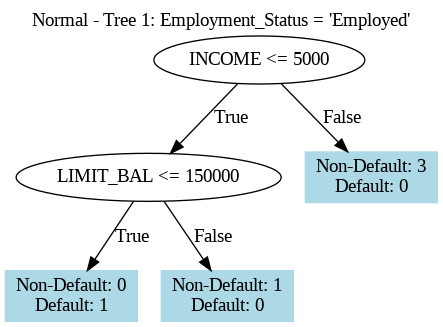

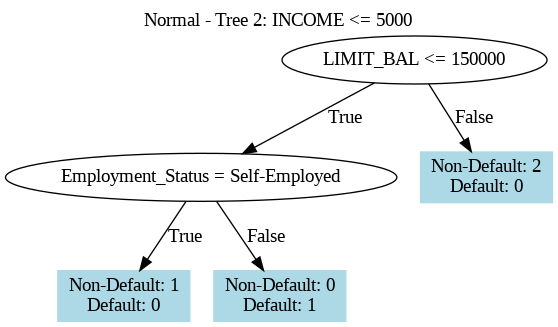

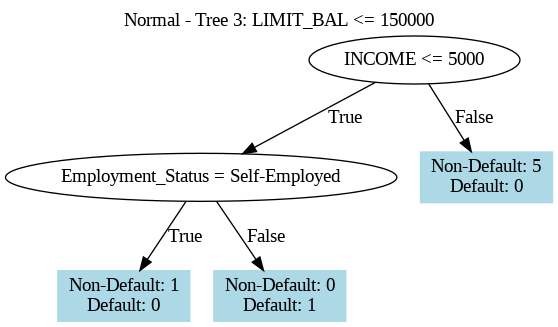

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

def create_tree_visualization(tree_number, label, nodes, edges):
    dot = Digraph()
    dot.attr(label=label)
    dot.attr(labelloc="t")

    for node_id, content in nodes.items():
        dot.node(node_id, content["label"], shape=content.get("shape", "ellipse"), style=content.get("style", None), color=content.get("color", None))

    for edge in edges:
        dot.edge(edge["from"], edge["to"], label=edge.get("label", ""))

    filename = f"tree_{tree_number}"
    dot.render(filename, format="png", cleanup=True)
    return Image(f"{filename}.png")

# Tree Definitions
def tree_1():
    label = "Normal - Tree 1: Employment_Status = 'Employed'"
    nodes = {
        "Root": {"label": "INCOME <= 5000"},
        "Left1": {"label": "LIMIT_BAL <= 150000"},
        "LL1": {"label": "Non-Default: 0\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 1\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 3\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(1, label, nodes, edges)

def tree_2():
    label = "Normal - Tree 2: INCOME <= 5000"
    nodes = {
        "Root": {"label": "LIMIT_BAL <= 150000"},
        "Left1": {"label": "Employment_Status = Self-Employed"},
        "LL1": {"label": "Non-Default: 1\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 0\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 2\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(2, label, nodes, edges)

def tree_3():
    label = "Normal - Tree 3: LIMIT_BAL <= 150000"
    nodes = {
        "Root": {"label": "INCOME <= 5000"},
        "Left1": {"label": "Employment_Status = Self-Employed"},
        "LL1": {"label": "Non-Default: 1\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 0\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 5\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(3, label, nodes, edges)

# Render all trees and display
images = [tree_1(), tree_2(), tree_3()]
display(*images)


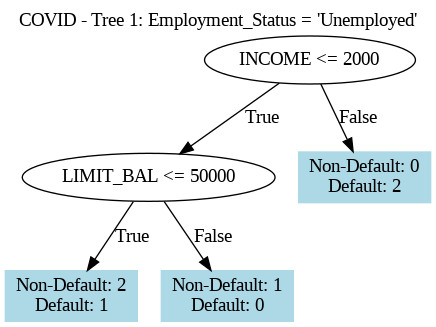

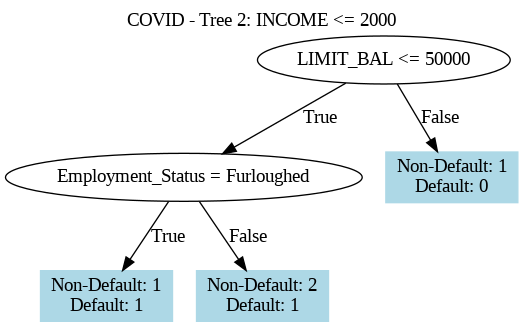

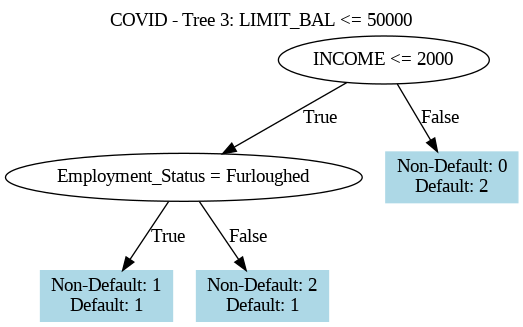

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

def create_tree_visualization(tree_number, label, nodes, edges):
    dot = Digraph()
    dot.attr(label=label)
    dot.attr(labelloc="t")

    for node_id, content in nodes.items():
        dot.node(node_id, content["label"], shape=content.get("shape", "ellipse"), style=content.get("style", None), color=content.get("color", None))

    for edge in edges:
        dot.edge(edge["from"], edge["to"], label=edge.get("label", ""))

    filename = f"tree_{tree_number}"
    dot.render(filename, format="png", cleanup=True)
    return Image(f"{filename}.png")

# Tree Definitions
def tree_1():
    label = "COVID - Tree 1: Employment_Status = 'Unemployed'"
    nodes = {
        "Root": {"label": "INCOME <= 2000"},
        "Left1": {"label": "LIMIT_BAL <= 50000"},
        "LL1": {"label": "Non-Default: 2\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 1\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 0\nDefault: 2", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(1, label, nodes, edges)

def tree_2():
    label = "COVID - Tree 2: INCOME <= 2000"
    nodes = {
        "Root": {"label": "LIMIT_BAL <= 50000"},
        "Left1": {"label": "Employment_Status = Furloughed"},
        "LL1": {"label": "Non-Default: 1\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 2\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 1\nDefault: 0", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(2, label, nodes, edges)

def tree_3():
    label = "COVID - Tree 3: LIMIT_BAL <= 50000"
    nodes = {
        "Root": {"label": "INCOME <= 2000"},
        "Left1": {"label": "Employment_Status = Furloughed"},
        "LL1": {"label": "Non-Default: 1\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "LR1": {"label": "Non-Default: 2\nDefault: 1", "shape": "box", "style": "filled", "color": "lightblue"},
        "Right1": {"label": "Non-Default: 0\nDefault: 2", "shape": "box", "style": "filled", "color": "lightblue"}
    }
    edges = [
        {"from": "Root", "to": "Left1", "label": "True"},
        {"from": "Left1", "to": "LL1", "label": "True"},
        {"from": "Left1", "to": "LR1", "label": "False"},
        {"from": "Root", "to": "Right1", "label": "False"}
    ]
    return create_tree_visualization(3, label, nodes, edges)

# Render all trees and display
images = [tree_1(), tree_2(), tree_3()]
display(*images)
